In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Guarnieri\Desktop\Hashtag_Python\7_days_of_code\data\Base_consolidada.csv")
display(df.head())

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas


In [10]:
# Garantir que a data está em datetime
df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'])

# Etapa 1: filtrar alunos
tipos_desejados = ['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO']
df_filtrado = df[df['tipo_vinculo_usuario'].isin(tipos_desejados)]

# Etapa 2: filtrar anos entre 2010 e 2020
df_filtrado = df_filtrado[
    (df_filtrado['data_emprestimo'].dt.year >= 2010) &
    (df_filtrado['data_emprestimo'].dt.year <= 2020)
]

# Etapa 3: descobrir qual coleção teve mais empréstimos
colecao_mais_frequente = (
    df_filtrado['colecao']
    .value_counts()
    .idxmax()
)

# Etapa 4: filtrar para essa coleção
df_final = df_filtrado[df_filtrado['colecao'] == colecao_mais_frequente]

# Etapa 5: extrair ano e mês
df_final['ano'] = df_final['data_emprestimo'].dt.year
df_final['mes'] = df_final['data_emprestimo'].dt.month

# Agrupar por ano e mês e contar empréstimos
emprestimos_mensais = (
    df_final.groupby(['ano', 'mes'])
    .size()
    .reset_index(name='total_emprestimos')
)

# Ordenar para visualização
emprestimos_mensais = emprestimos_mensais.sort_values(by=['ano', 'mes'])

# Exibir
display(emprestimos_mensais)

C:\Users\Guarnieri\AppData\Local\Temp\ipykernel_26532\3823557862.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['ano'] = df_final['data_emprestimo'].dt.year
C:\Users\Guarnieri\AppData\Local\Temp\ipykernel_26532\3823557862.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['mes'] = df_final['data_emprestimo'].dt.month


,ano,mes,total_emprestimos
0,2010,1,4101
1,2010,2,9243
2,2010,3,18194
3,2010,4,15146
4,2010,5,14678
...,...,...,...
119,2019,12,3049
120,2020,1,2924
121,2020,2,9327
122,2020,3,10156


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir datetime
df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'])

# Filtrar tipos de usuários
tipos_desejados = ['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO']
df_filtrado = df[df['tipo_vinculo_usuario'].isin(tipos_desejados)]

# Filtrar por ano
df_filtrado = df_filtrado[
    (df_filtrado['data_emprestimo'].dt.year >= 2010) &
    (df_filtrado['data_emprestimo'].dt.year <= 2020)
]

# Descobrir coleção com maior número de empréstimos
colecao_mais_frequente = (
    df_filtrado['colecao']
    .value_counts()
    .idxmax()
)

# Filtrar pela coleção mais frequente
df_final = df_filtrado[df_filtrado['colecao'] == colecao_mais_frequente]

# Extrair ano e mês
df_final['ano'] = df_final['data_emprestimo'].dt.year
df_final['mes'] = df_final['data_emprestimo'].dt.month

# Agrupar: contar empréstimos mensais por tipo de usuário, ano e mês
emprestimos_mensais = (
    df_final
    .groupby(['tipo_vinculo_usuario', 'ano', 'mes'])
    .size()
    .reset_index(name='total_emprestimos')
)


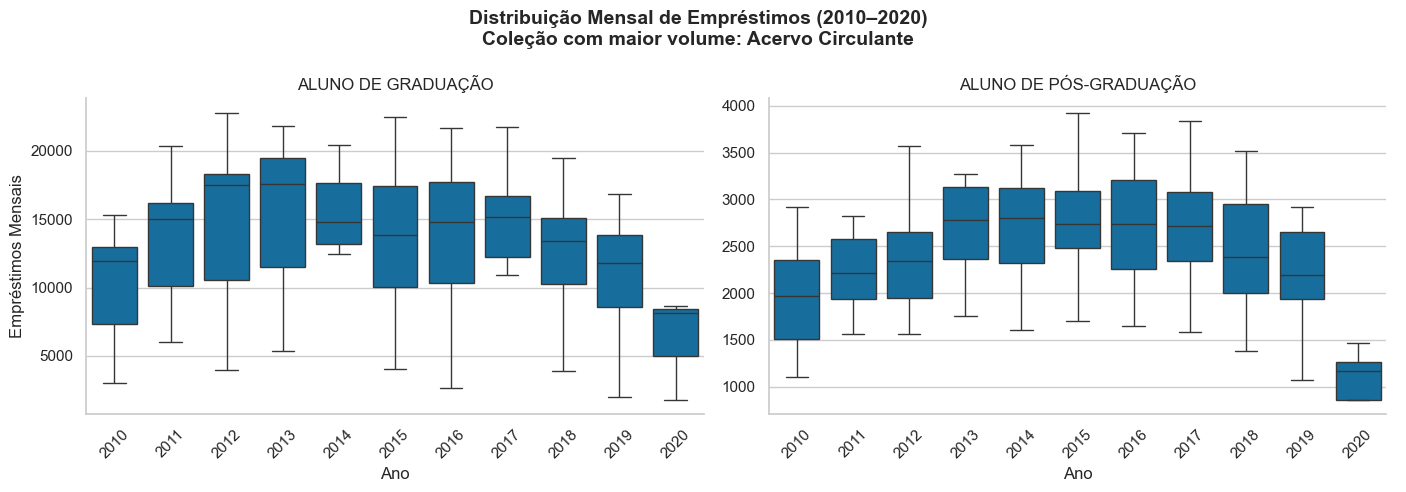

In [13]:
sns.set_theme(style="whitegrid", palette="colorblind")

g = sns.catplot(
    data=emprestimos_mensais,
    x="ano",
    y="total_emprestimos",
    col="tipo_vinculo_usuario",
    kind="box",
    height=5,
    aspect=1.4,
    sharey=False,
    showfliers=False,  # Oculta outliers para foco na tendência geral
)

# Títulos e ajustes visuais
g.set_titles("{col_name}")
g.set_axis_labels("Ano", "Empréstimos Mensais")
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(
    f"Distribuição Mensal de Empréstimos (2010–2020)\nColeção com maior volume: {colecao_mais_frequente}",
    fontsize=14,
    fontweight='bold'
)

# Remover bordas superiores e direitas
for ax in g.axes.flat:
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()